In [1]:
import pymongo
import pandas as pd
import numpy as np

from pymongo import MongoClient
from bson.objectid import ObjectId

import datetime

import matplotlib.pyplot as plt

from collections import defaultdict


%matplotlib inline
import json
plt.style.use('ggplot')

import seaborn as sns

In [2]:
## Connect to local DB

client = MongoClient('localhost', 27017)
print ("Setup db access")

Setup db access


In [3]:
#
# Get collections from mongodb
#
db = client.my_test_db
reponses = db.anon_student_task_responses.find()

In [4]:
df_responses = pd.DataFrame(list(reponses))

In [5]:
print (df_responses.head())

                        _id  bonus  correct      diff          id  incomplete  \
0  59d26fd9d0cd262c1b000001  False     True  0.000000  b6c1c8dLXx       False   
1  59d26fd9d0cd262c1b000002  False     True  0.420887  iszM3s-aZG       False   
2  59d26fd9d0cd262c1b000003  False     True  0.420887  8UwKe-OymU       False   
3  59d26fd9d0cd262c1b000004  False     True  0.782085  FhOINzRAKB       False   
4  59d26fd9d0cd262c1b000005   True     True  0.500000  GhmchxnUUV       False   

          lesson                                      level_summary  \
0  basic_add_5_1  {'type': 'lesson', 'entered': True, 'time_ente...   
1  basic_add_5_1  {'type': 'lesson', 'entered': True, 'time_ente...   
2  basic_add_5_1  {'type': 'lesson', 'entered': True, 'time_ente...   
3  basic_add_5_1  {'type': 'lesson', 'entered': True, 'time_ente...   
4  basic_add_5_1  {'type': 'lesson', 'entered': True, 'time_ente...   

                                         problem_set problem_set_id    ...     \
0  le

In [6]:
## Look act columns
print (df_responses.columns)

Index(['_id', 'bonus', 'correct', 'diff', 'id', 'incomplete', 'lesson',
       'level_summary', 'problem_set', 'problem_set_id',
       'problem_set_subspace', 'qual_id', 'randomly_selected', 'response',
       'response_idx', 'retried', 'screenshot_url', 'second_try', 'session_id',
       'student', 'sublesson', 't', 'time_spent', 'timestamp', 'txt',
       'untouched'],
      dtype='object')


In [7]:
## How many data samples
print (len(df_responses), "Number of entries")

52247 Number of entries


In [8]:
## Example data samle
print (df_responses.iloc[1])

_id                                              59d26fd9d0cd262c1b000002
bonus                                                               False
correct                                                              True
diff                                                             0.420887
id                                                             iszM3s-aZG
incomplete                                                          False
lesson                                                      basic_add_5_1
level_summary           {'type': 'lesson', 'entered': True, 'time_ente...
problem_set             lessons/fractions/lesson31_9/part_a/media/prob...
problem_set_id                                                 t8suuCs7vN
problem_set_subspace                                          l31_9_parta
qual_id                                 t8suuCs7vN.l31_9_parta.iszM3s-aZG
randomly_selected                                                   False
response                {'numberline_a

In [9]:
print ("Number of unique lessions", len(df_responses['lesson'].unique()) )
print ("Unique lessions", df_responses['lesson'].unique())

Number of unique lessions 221
Unique lessions ['basic_add_5_1' 'add_mixed_1' 'simplify_4' 'simplify_5' 'equiv_1_s1'
 'review_lesson_1' 'simplify_3' 'simplify_2' 'simplify_0' 'simplify_1'
 'review_lesson_2' 'basic_add_3' 'basic_add_4' 'explore_fract_1_v2'
 'nline_3a' 'nline_3b' 'nline_3c' 'improper_5' 'basic_add_1'
 'model_symbol_3_v3' 'benchmark_2' 'ordering_6' 'benchmark_1'
 'equivalence_5' 'explore_deci_1' 'deci_nline_1' 'benchmark_3' 'ordering_7'
 'ordering_8' 'equivalence_0' 'equivalence_1' 'equiv_1_v2' 'sets_2_v2'
 'sets_2_s1' 'sets_2_s2' 'sets_3_v2' 'sets_3_s1' 'sets_3_s2' 'sets_4'
 'review_lesson_4' 'nline_1b' 'nline_1' 'nline_1c' 'nline_1a' 'nline_2'
 'nline_4' 'mult_whole_frac_review_2' 'mult_whole_frac_review_1'
 'division_2' 'division_3' 'sub_symbol_2' 'mult_whole_mixed_1'
 'add_symbol_3' 'sub_mixed_1' 'sub_model_1' 'basic_ordering_7' 'division_5'
 'division_6' 'nline_0b' 'division_7' 'division_8' 'ordering_2_v3'
 'ordering_2_v3_s1' 'ordering_3' 'adv_ordering_1' 'adv_orderin

In [10]:
print ("Samples of each lesson",df_responses['lesson'].value_counts())

Samples of each lesson review_lesson_1             3399
review_lesson_2             2418
name_fract_1_v2             2247
model_symbol_3_v3           1737
explore_fract_1_v2          1504
nline_1b                    1365
model_symbol_5              1151
nline_2                     1133
ordering_2_v3               1125
ordering_8                  1124
nline_0b                    1011
explore_fract_2              977
basic_ordering_1             867
nline_0c                     759
ordering_1_v3                750
nline_1                      737
ordering_3                   732
benchmark_2                  704
equivalence_0                697
nline_1a                     696
parts_whole_2                671
model_symbol_1_v2            667
ordering_6                   656
nline_3c                     647
basic_ordering_7             611
ordering_5                   560
nline_1c                     559
benchmark_1                  523
equiv_1_v2                   522
ordering_0          

In [11]:
print ("Summary sample :", df_responses['level_summary'][0])

Summary sample : {'type': 'lesson', 'entered': True, 'time_entered': 1506652363265.0, 'subject': 'fractions', 'unit_rank': 4, 'path': 'basic_add_5_1', 'lm_stats': {'is_new': True, 'created': 1503772100340.0, 'cmodule_name': 'wootmath_fractions', 'subject': 'fractions', 'star_count': 0, 'last_update': 1503772100340.0, 'lesson_name': 'basic_add_5_1'}, 't_elapsed': 187518, 'lesson_type': 'l', 'description': 'In this lesson, students add fractions and mixed numbers using number line.\n', 'time_exited': 1506652550752.0, 'problems': {'nwrong': 0, 'ntotal': 5, 'nright': 5, 'nretry_right': 0, 'nuntouched': 0, 'nretry_wrong': 0}, 'mastery': {'mean': 0.6558873935892596, 'std_dev': 0.3816044758863284}, 'stars': {'earned': 3, 'old': 0}, 'unit_name': 'frac_add_sub_1', 'blank_slate_mastery': {'mean': 0.6558873935892596, 'std_dev': 0.3816044758863284}, 'name': 'basic_add_5_1', 'title': 'Adding Mixed Numbers and Fractions Using Number Line'}


In [12]:
## Promote student info, level summary, level summary problem results

In [13]:
df2 = df_responses.join(pd.DataFrame(df_responses["student"].to_dict()).T)

In [14]:
df2 = df2.join(pd.DataFrame(df2['level_summary'].to_dict()).T)

In [15]:
df2 = df2.join(pd.DataFrame(df2['problems'].to_dict()).T)

In [16]:
df_student1 = df2.groupby('student_id').agg({ 'lesson':[len,  pd.Series.nunique ], 'ntotal':sum, 'nright':sum })

In [17]:
df_student1['percent_correct'] = df_student1['nright']['sum'].astype(float) / df_student1['ntotal']['sum']

In [18]:
df_student1

lesson         ntotal nright percent_correct
                len nunique    sum    sum                
student_id                                               
007D5A2F1        18       2    136    108        0.794118
01Q4G6G2B1       16       1    110    105        0.954545
01Q9N3V2Y1      100      16    523    480        0.917782
01S4P4N2D1       10       2     82     82        1.000000
0205Q2E1         58       4    482    386        0.800830
02B1W2I4S1       35       6    217    217        1.000000
02X8I4D2T1       31       5    151    121        0.801325
032P4C2V1        80      12    383    348        0.908616
03D1R2O4A1       20       3    172    162        0.941860
03S0J2R4J1       16       4     70     57        0.814286
03X1L8B2A1       89       7    745    617        0.828188
03Z0W8Z2D1      157       5   1096    670        0.611314
04R0N2Z4A1       22       3    160    147        0.918750
04Y3F1K4J1       15       2    105     52        0.495238
051X8T2F1        65       7    314    257        0.818471
05W3M0O4F1       88       9    665    476        0.715789
06A6H1Z4N1       83       4    922    637        0.690889
07D4J8U2N1      119      20    643    559        0.869362
07D9Q3V3A1       27       3    199    176        0.884422
07H6J5P2A1       24       4    120    110        0.916667
07J6W1Z4R1       24       3    176    146        0.829545
0823B2G1        101      18    497    492        0.989940
08C0U8Z2T1       15       1     82     51        0.621951
08H1X4R3S1       15       3     75     75        1.000000
099G6L2T1        21       3    149    126        0.845638
0A2N7G5O2T1     116      10    978    734        0.750511
0A5H7R7D2S1     143      15    781    660        0.845070
0B1W2D0C4U1      39       7    195    185        0.948718
0B3Z4Q6F2F1      27       2    293    184        0.627986
0B5E6B5K2O1      88       6   1082    316        0.292052
...             ...     ...    ...    ...             ...
Y4D0J4R6A2H1     37       1    287    205        0.714286
Y5K4O0F8Z2A1     73      11    407    347        0.852580
Y5Q0B4G4B2D1     19       2    171    152        0.888889
Y6A4Y1C5B2C1      4       1     16     16        1.000000
Y6V4Z6N3J2J1     11       2     61     61        1.000000
Y6Z5T9B7O2E1     16       2    112     87        0.776786
Y7B8I8Z3R2B1     36       6    182    173        0.950549
Y7M1U1U7A2B1     27       5    141    129        0.914894
Y8P8X0Y2Q4H1     10       1     90     70        0.777778
Y9T0W4O4T2D1     20       3    136    130        0.955882
Y9X0L8Y4Y2L1    164      11   1280    982        0.767188
Z0G8G7M2Q2Z1      9       1     72     63        0.875000
Z2S9K7S8A3B1     10       2     50     50        1.000000
Z3E3I1N2G4Z1     86       7    904    532        0.588496
Z3H6S2F3M2B1    112      16    642    548        0.853583
Z3M9R3L8D2W1     37       5    207    166        0.801932
Z3Q0O9F3D2G1     50       4    406    364        0.896552
Z3S2E8M4D2X1     17       2    121    104        0.859504
Z4B5P9H7S2V1     18       2    162    162        1.000000
Z4G0K6F4S2U1     38       7    196    184        0.938776
Z4I9P0Y8M2D1     35       3    270    220        0.814815
Z4U5I0O8W2A1    171      24    893    791        0.885778
Z5F3Z5J4S2H1     87       9    725    665        0.917241
Z5N6I4E8R2I1     19       3    131    131        1.000000
Z5R5E6R1K4B1     34       3    274    238        0.868613
Z6J7J6M8O3O1      2       1      4      0        0.000000
Z8H0M1Q2F4C1     24       3    188    187        0.994681
Z8N2Y6S5Z2O1     45       6    348    319        0.916667
Z8T8L4T4A2L1      9       1     81     72        0.888889
Z9N7O6C4D2D1     78       9    659    614        0.931715

[1156 rows x 5 columns]

In [19]:
y1 = np.array(df_student1['lesson']['len'])

(array([ 201.,  256.,  185.,  133.,   88.,   71.,   54.,   36.,   38.,
          15.,   18.,   12.,   10.,   13.,    5.,    7.,    3.,    4.,
           0.,    0.,    0.,    2.,    0.,    0.,    0.,    1.,    1.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    1.]),
 array([   1. ,   12.6,   24.2,   35.8,   47.4,   59. ,   70.6,   82.2,
          93.8,  105.4,  117. ,  128.6,  140.2,  151.8,  163.4,  175. ,
         186.6,  198.2,  209.8,  221.4,  233. ,  244.6,  256.2,  267.8,
         279.4,  291. ,  302.6,  314.2,  325.8,  337.4,  349. ,  360.6,
         372.2,  383.8,  395.4,  407. ,  418.6,  430.2,  441.8,  453.4,
         465. ]),
 <a list of 40 Patch objects>)

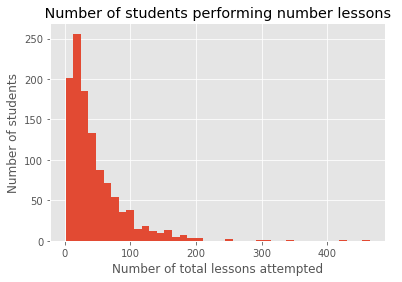

In [20]:
# Total Lessons per student

plt.title(' Number of students performing number lessons ')
plt.xlabel('Number of total lessons attempted')
plt.ylabel('Number of students')
plt.hist(y1, bins=40)




(array([ 239.,  196.,  152.,  114.,   86.,   67.,   53.,   38.,   36.,
          28.,   25.,   22.,    9.,    9.,    7.,   12.,   13.,    9.,
           6.,    5.,    1.,    7.,    1.,    6.,    6.,    0.,    2.,
           1.,    3.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    2.]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.]),
 <a list of 40 Patch objects>)

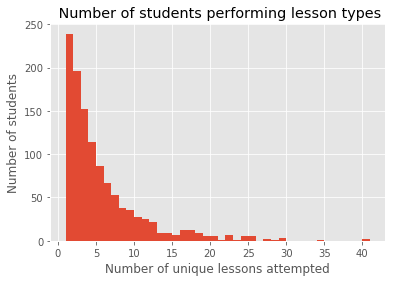

In [21]:
# Uniqe students per # of unique lessons
y2 = np.array(df_student1['lesson']['nunique'])
plt.title(' Number of students performing lesson types')
plt.xlabel('Number of unique lessons attempted')
plt.ylabel('Number of students')
plt.hist(y2, bins=40)

(array([  27.,    0.,    0.,    0.,    1.,    3.,    0.,    1.,    2.,
           1.,    4.,    2.,    1.,    3.,    6.,    4.,    3.,    8.,
           3.,    8.,   13.,   12.,   14.,   16.,   19.,   18.,   24.,
          24.,   20.,   45.,   59.,   49.,   79.,   78.,  107.,  126.,
         110.,   95.,   53.,  118.]),
 array([ 0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,  0.175,
         0.2  ,  0.225,  0.25 ,  0.275,  0.3  ,  0.325,  0.35 ,  0.375,
         0.4  ,  0.425,  0.45 ,  0.475,  0.5  ,  0.525,  0.55 ,  0.575,
         0.6  ,  0.625,  0.65 ,  0.675,  0.7  ,  0.725,  0.75 ,  0.775,
         0.8  ,  0.825,  0.85 ,  0.875,  0.9  ,  0.925,  0.95 ,  0.975,  1.   ]),
 <a list of 40 Patch objects>)

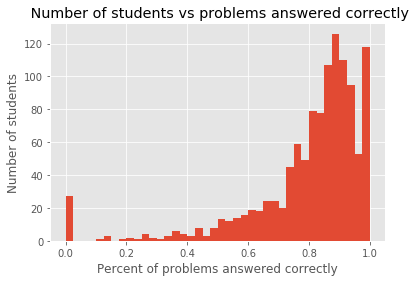

In [22]:
# Uniqe students per # of unique lessons
y3 = np.array(df_student1['percent_correct'])
plt.title(' Number of students vs problems answered correctly')
plt.xlabel('Percent of problems answered correctly')
plt.ylabel('Number of students')
plt.hist(y3, bins = 40)

In [24]:
df2.columns

Index(['_id', 'bonus', 'correct', 'diff', 'id', 'incomplete', 'lesson',
       'level_summary', 'problem_set', 'problem_set_id',
       'problem_set_subspace', 'qual_id', 'randomly_selected', 'response',
       'response_idx', 'retried', 'screenshot_url', 'second_try', 'session_id',
       'student', 'sublesson', 't', 'time_spent', 'timestamp', 'txt',
       'untouched', 'grade', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong'],
      dtype='object')

In [25]:
df2['subject'].unique()

array(['fractions', 'review', 'decimals', 'ratios', 'rational_numbers'], dtype=object)

In [26]:
df2.iloc[0]

_id                                              59d26fd9d0cd262c1b000001
bonus                                                               False
correct                                                              True
diff                                                                    0
id                                                             b6c1c8dLXx
incomplete                                                          False
lesson                                                      basic_add_5_1
level_summary           {'type': 'lesson', 'entered': True, 'time_ente...
problem_set             lessons/fractions/lesson31_9/part_a/media/prob...
problem_set_id                                                 t8suuCs7vN
problem_set_subspace                                          l31_9_parta
qual_id                                 t8suuCs7vN.l31_9_parta.b6c1c8dLXx
randomly_selected                                                   False
response                {'numberline_a

In [27]:
df2.iloc[0]['response']

{'fraction_cblock_chains': [{'lcm_sum': {'__as3_type': 'Fraction',
    'denominator': 4,
    'numerator': 3},
   'left': 509,
   'pieces': ['1/4', '1/4', '1/4'],
   'right': 865,
   'sum': {'__as3_type': 'Fraction', 'denominator': 4, 'numerator': 3},
   'top': 355}],
 'fraction_cblock_containment': {},
 'fraction_cblock_counts': {'1/4': 3},
 'fraction_cblock_total_count': 3,
 'input': '8',
 'numberline_associations': [[{'obj_name': 'a_text',
    'obj_value': 'A',
    'pos_value': 1.752535558428964,
    'position': 676.9330855018587}]]}

In [28]:
df_lesson1 = df2.groupby('lesson').agg({ 'student_id':[len,  pd.Series.nunique ], 'ntotal':sum, 'nright':sum })

In [29]:
df_lesson1['percent_correct'] = df_lesson1['nright']['sum'].astype(float) / df_lesson1['ntotal']['sum']

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   1.,   2.,   0.,   1.,   2.,   0.,   2.,   2.,   4.,
          2.,   3.,   1.,   3.,   7.,  13.,  11.,  17.,  17.,  14.,  18.,
         15.,  21.,  23.,   9.,  16.,   3.,  11.]),
 array([ 0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,  0.175,
         0.2  ,  0.225,  0.25 ,  0.275,  0.3  ,  0.325,  0.35 ,  0.375,
         0.4  ,  0.425,  0.45 ,  0.475,  0.5  ,  0.525,  0.55 ,  0.575,
         0.6  ,  0.625,  0.65 ,  0.675,  0.7  ,  0.725,  0.75 ,  0.775,
         0.8  ,  0.825,  0.85 ,  0.875,  0.9  ,  0.925,  0.95 ,  0.975,  1.   ]),
 <a list of 40 Patch objects>)

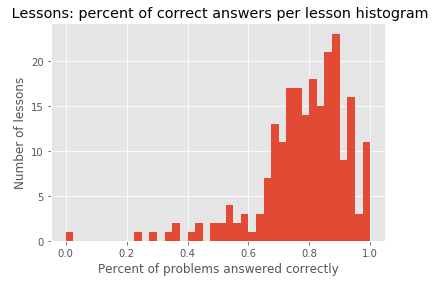

In [30]:
# Lessons and answers
y3 = np.array(df_lesson1['percent_correct'])
plt.title(' Lessons: percent of correct answers per lesson histogram')
plt.xlabel('Percent of problems answered correctly')
plt.ylabel('Number of lessons')
plt.hist(y3, bins = 40)

In [34]:
df_lesson1

student_id         ntotal nright percent_correct
                                   len nunique    sum    sum                
lesson                                                                      
add_benchmark_1                    272      24   2233   1211        0.542320
add_estimate_uncommon_den_1        120      17    699    635        0.908441
add_mixed_1                         54       5    282    194        0.687943
add_mixed_2                         60       8    259    224        0.864865
add_symbol_1                        71      11    373    329        0.882038
add_symbol_2                        63       9    305    258        0.845902
add_symbol_3                        65       9    307    224        0.729642
add_uncommon_den_1                 146      18   1082    834        0.770795
add_uncommon_den_2                 208      24   1419   1037        0.730796
add_uncommon_den_2_s1               14       3     52     48        0.923077
add_uncommon_den_3                 153      19   1086    773        0.711786
add_uncommon_den_4                  85      14    465    423        0.909677
add_uncommon_den_5                  79      10    373    339        0.908847
add_uncommon_den_6                  47       9    231    224        0.969697
adv_ordering_1                     418      61   2767   2577        0.931334
adv_ordering_2                     431      57   3065   2322        0.757586
advanced_add_0                     117      18    826    753        0.911622
advanced_add_1                     187      20   1204    857        0.711794
advanced_sub_0                     215      22   1278   1032        0.807512
advanced_sub_1                     130      17    706    512        0.725212
basic_add_1                        261      28   1871   1088        0.581507
basic_add_2                         95      14    575    517        0.899130
basic_add_3                        131      11    702    465        0.662393
basic_add_4                         48       7    197    169        0.857868
basic_add_4_1                       45       7    229    172        0.751092
basic_add_5                         28       4    156    148        0.948718
basic_add_5_1                       20       4    100    100        1.000000
basic_ordering_1                   867     121   5687   5055        0.888869
basic_ordering_3                   327      58   1638   1509        0.921245
basic_ordering_4                   330      42   2301   2058        0.894394
...                                ...     ...    ...    ...             ...
sets_1_s1                            4       1     16     16        1.000000
sets_1_s2                            4       1     16     16        1.000000
sets_1_v2                          141      23    876    764        0.872146
sets_2_s1                            9       2     36     31        0.861111
sets_2_s2                           20       2    160    129        0.806250
sets_2_v2                          202      25   1090    898        0.823853
sets_3_s1                           16       2     64     42        0.656250
sets_3_s2                            9       2     36     31        0.861111
sets_3_v2                          167      21   1173    950        0.809889
sets_4                             124      19    655    586        0.894656
simplify_0                         336      39   2701   1958        0.724917
simplify_1                         243      22   1884   1640        0.870488
simplify_2                         239      20   1691   1145        0.677114
simplify_3                         188      17   1020    604        0.592157
simplify_4                         290      27   1413    988        0.699222
simplify_5                         236      24   1772   1531        0.863995
sub_mixed_1                         58       6    494    343        0.694332
sub_mixed_2                         33       4    219    191        0.872146
sub_mixed_3             

In [36]:
df_lesson1.sort_values('percent_correct')

student_id         ntotal nright percent_correct
                                len nunique    sum    sum                
lesson                                                                   
sub_mixed_4                       8       1     56      0        0.000000
mult_whole_frac_review_1         17       3     49     12        0.244898
unit_rate_3                      15       1    210     60        0.285714
sub_symbol_1                     35       5    301     99        0.328904
mult_whole_frac_6               107       6    874    310        0.354691
unit_rate_1                     109       9   1060    386        0.364151
deci_nline_4_s1                  18       2     99     40        0.404040
division_15                      69       6    478    208        0.435146
intro_ratio_1                   348      17   4085   1791        0.438433
intro_rat_num_3                   7       2     25     12        0.480000
division_6                       31       3    149     74        0.496644
sub_symbol_3                      9       2     36     18        0.500000
mult_whole_frac_5                28       5    126     65        0.515873
name_fract_2_s1                 241      19   2463   1303        0.529030
sub_nline_1                      66       8    556    297        0.534173
explore_deci_5_2                 33       4    189    102        0.539683
add_benchmark_1                 272      24   2233   1211        0.542320
division_14                     125       9   1165    656        0.563090
ordering_6                      656      60   5113   2881        0.563466
basic_add_1                     261      28   1871   1088        0.581507
simplify_3                      188      17   1020    604        0.592157
intro_rat_num_2                  53       4    607    361        0.594728
rat_num_ord_abs_4                40       5    312    188        0.602564
ordering_2_v3_s1                148      17    743    473        0.636608
explore_deci_12                  44       5    257    164        0.638132
equivalence_6                   491      53   3085   2001        0.648622
sets_3_s1                        16       2     64     42        0.656250
ordering_7                      380      39   2647   1750        0.661126
basic_add_3                     131      11    702    465        0.662393
sub_model_1                      77       8    499    333        0.667335
...                             ...     ...    ...    ...             ...
div_mixed_frac_1                  7       1     27     25        0.925926
division_8                        7       2     27     25        0.925926
deci_nline_1_s1                  17       4     68     63        0.926471
equivalence_4                   263      44   1471   1368        0.929980
model_symbol_4                  377      52   2556   2378        0.930360
adv_ordering_1                  418      61   2767   2577        0.931334
rat_num_ord_abs_2                31       5    191    179        0.937173
model_symbol_2_s1                16       4     64     60        0.937500
equivalence_2                   366      57   2297   2157        0.939051
intro_rat_num_7                  19       2    171    161        0.941520
explore_deci_13                  21       4    105     99        0.942857
explore_deci_9                   21       4    105     99        0.942857
improper_4                       84      12    456    430        0.942982
ordering_3_1                    192      36    946    896        0.947146
model_symbol_3_s1                96      23    381    361        0.947507
basic_add_5                      28       4    156    148        0.948718
nline_1c                        559      83   3945   3774        0.956654
rat_num_ord_abs_5                30       6    150    145        0.966667
add_uncommon_den_6               47       9    231    224        0.969697
mult_frac_frac_1                 11       1     83     81        0.975904
rat_num_ord_abs_6            

In [37]:
df3  = df2.copy()

In [38]:
df3['percent_correct'] = df3['nright'].astype(float) / df3['ntotal']

In [ ]:
## Make 'description' a feature wih important words mapped

In [47]:
df3.columns

Index(['_id', 'bonus', 'correct', 'diff', 'id', 'incomplete', 'lesson',
       'level_summary', 'problem_set', 'problem_set_id',
       'problem_set_subspace', 'qual_id', 'randomly_selected', 'response',
       'response_idx', 'retried', 'screenshot_url', 'second_try', 'session_id',
       'student', 'sublesson', 't', 'time_spent', 'timestamp', 'txt',
       'untouched', 'grade', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong', 'percent_correct'],
      dtype='object')

In [50]:
df3.iloc[0]

_id                                              59d26fd9d0cd262c1b000001
bonus                                                               False
correct                                                              True
diff                                                                    0
id                                                             b6c1c8dLXx
incomplete                                                          False
lesson                                                      basic_add_5_1
level_summary           {'type': 'lesson', 'entered': True, 'time_ente...
problem_set             lessons/fractions/lesson31_9/part_a/media/prob...
problem_set_id                                                 t8suuCs7vN
problem_set_subspace                                          l31_9_parta
qual_id                                 t8suuCs7vN.l31_9_parta.b6c1c8dLXx
randomly_selected                                                   False
response                {'numberline_a

In [51]:
df3.iloc[0]['txt']

'Madelyn ran  1 1/4 miles, stopped, and then ran 2/4 of a mile.\nDrag A to the number line to show the total distance Madelyn ran.\nAnswer: 1.75'

In [52]:
df3.iloc[0]['description']

'In this lesson, students add fractions and mixed numbers using number line.\n'

In [69]:
for idx in range(100):
    print (df3.iloc[idx]['lesson'])
    print (df3.iloc[idx]['response'])

basic_add_5_1
{'numberline_associations': [[{'obj_value': 'A', 'obj_name': 'a_text', 'pos_value': 1.752535558428964, 'position': 676.9330855018587}]], 'fraction_cblock_counts': {'1/4': 3}, 'fraction_cblock_containment': {}, 'fraction_cblock_chains': [{'sum': {'numerator': 3, 'denominator': 4, '__as3_type': 'Fraction'}, 'right': 865, 'lcm_sum': {'numerator': 3, 'denominator': 4, '__as3_type': 'Fraction'}, 'top': 355, 'left': 509, 'pieces': ['1/4', '1/4', '1/4']}], 'input': '8', 'fraction_cblock_total_count': 3}
basic_add_5_1
{'numberline_associations': [[{'obj_value': 'A', 'obj_name': 'a_text', 'pos_value': 1.674953531598513, 'position': 648.3828996282527}]], 'fraction_cblock_counts': {'1': 1, '1/6': 4, '1/2': 1}, 'fraction_cblock_containment': {}, 'fraction_cblock_chains': [{'sum': {'numerator': 5, 'denominator': 3, '__as3_type': 'Fraction'}, 'right': 830, 'lcm_sum': {'numerator': 10, 'denominator': 6, '__as3_type': 'Fraction'}, 'top': 355, 'left': 140, 'pieces': ['1/6', '1/6', '1/6', 

In [100]:
my_val = (str(df3.iloc[0]['response']))
my_val = my_val.replace("': ","_")
my_val = my_val.replace("_{"," ")
my_val = my_val.replace("_[",", ")
for c in [']','[','{','}',"'",""]:
    my_val = my_val.replace(c,'')

In [101]:
my_val

'numberline_associations, obj_value_A, obj_name_a_text, pos_value_1.752535558428964, position_676.9330855018587, fraction_cblock_counts 1/4_3, fraction_cblock_containment , fraction_cblock_chains, sum numerator_3, denominator_4, __as3_type_Fraction, right_865, lcm_sum numerator_3, denominator_4, __as3_type_Fraction, top_355, left_509, pieces, 1/4, 1/4, 1/4, input_8, fraction_cblock_total_count_3'

In [95]:
str(df3.iloc[0]['response'])

"{'numberline_associations': [[{'obj_value': 'A', 'obj_name': 'a_text', 'pos_value': 1.752535558428964, 'position': 676.9330855018587}]], 'fraction_cblock_counts': {'1/4': 3}, 'fraction_cblock_containment': {}, 'fraction_cblock_chains': [{'sum': {'numerator': 3, 'denominator': 4, '__as3_type': 'Fraction'}, 'right': 865, 'lcm_sum': {'numerator': 3, 'denominator': 4, '__as3_type': 'Fraction'}, 'top': 355, 'left': 509, 'pieces': ['1/4', '1/4', '1/4']}], 'input': '8', 'fraction_cblock_total_count': 3}"

In [124]:
def stringify_response(resp):
    my_val = str(resp).replace("': ","_")
    my_val = my_val.replace("_{"," ")
    my_val = my_val.replace("_[",", ")
    for c in [']','[','{','}',"'","",","]:
        my_val = my_val.replace(c,'')
    return my_val


In [125]:
stringify_response(df3.iloc[0]['response'])

'numberline_associations obj_value_A obj_name_a_text pos_value_1.752535558428964 position_676.9330855018587 fraction_cblock_counts 1/4_3 fraction_cblock_containment  fraction_cblock_chains sum numerator_3 denominator_4 __as3_type_Fraction right_865 lcm_sum numerator_3 denominator_4 __as3_type_Fraction top_355 left_509 pieces 1/4 1/4 1/4 input_8 fraction_cblock_total_count_3'

In [126]:
df3['response_str'] = df3['response'].apply(stringify_response)

In [127]:
for idx in range(20):
    print (idx, df3['response_str'].iloc[idx])

0 numberline_associations obj_value_A obj_name_a_text pos_value_1.752535558428964 position_676.9330855018587 fraction_cblock_counts 1/4_3 fraction_cblock_containment  fraction_cblock_chains sum numerator_3 denominator_4 __as3_type_Fraction right_865 lcm_sum numerator_3 denominator_4 __as3_type_Fraction top_355 left_509 pieces 1/4 1/4 1/4 input_8 fraction_cblock_total_count_3
1 numberline_associations obj_value_A obj_name_a_text pos_value_1.674953531598513 position_648.3828996282527 fraction_cblock_counts 1_1 1/6_4 1/2_1 fraction_cblock_containment  fraction_cblock_chains sum numerator_5 denominator_3 __as3_type_Fraction right_830 lcm_sum numerator_10 denominator_6 __as3_type_Fraction top_355 left_140 pieces 1/6 1/6 1/6 1/6 1 sum numerator_1 denominator_2 __as3_type_Fraction right_670 lcm_sum numerator_1 denominator_2 __as3_type_Fraction top_833 left_325 pieces 1/2 input_12 fraction_cblock_total_count_6
2 numberline_associations obj_value_A obj_name_a_text pos_value_1.6671953289154677 p

In [129]:
df3.columns

Index(['_id', 'bonus', 'correct', 'diff', 'id', 'incomplete', 'lesson',
       'level_summary', 'problem_set', 'problem_set_id',
       'problem_set_subspace', 'qual_id', 'randomly_selected', 'response',
       'response_idx', 'retried', 'screenshot_url', 'second_try', 'session_id',
       'student', 'sublesson', 't', 'time_spent', 'timestamp', 'txt',
       'untouched', 'grade', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong', 'percent_correct', 'response_str'],
      dtype='object')

In [131]:
df3.to_csv('data_frame_with_string_response.csv')

In [132]:
df_lesson1.to_csv('lesson_summary.csv')